In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

Variable	Definition	Key

survival 	Survival 	0 = No, 1 = Yes
pclass 	    Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	    Sex 	
Age 	    Age in years 	
sibsp 	    # of siblings / spouses aboard the Titanic 	
parch 	    # of parents / children aboard the Titanic 	
ticket 	    Ticket number 	
fare 	    Passenger fare 	
cabin 	    Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

Number of unique tickets 929 for 1309 passengers
Age            1046
Cabin           295
Embarked       1307
Fare           1308
Name           1309
Parch          1309
PassengerId    1309
Pclass         1309
Sex            1309
SibSp          1309
Survived        891
dtype: int64
Count of each place of embarkment
 2.0    914
0.0    270
1.0    123
Name: Embarked, dtype: int64
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Mme               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Sir               1
Lady              1
Capt              1
Name: Title, dtype: int64


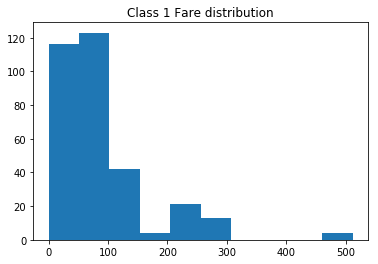

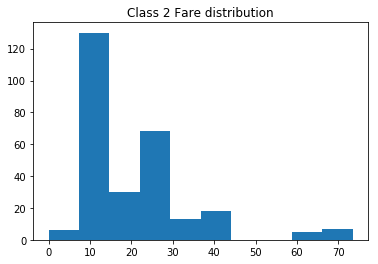

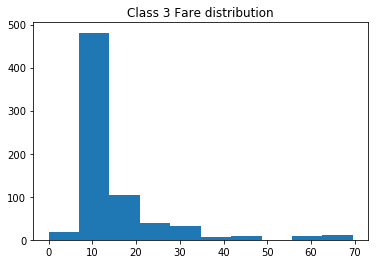

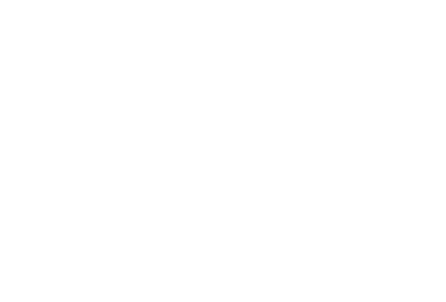

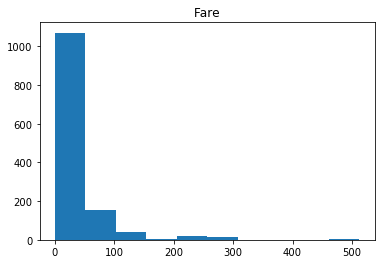

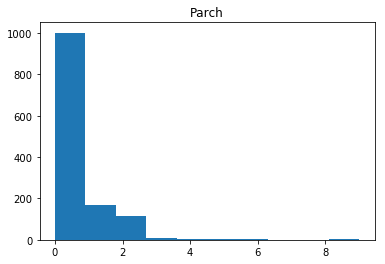

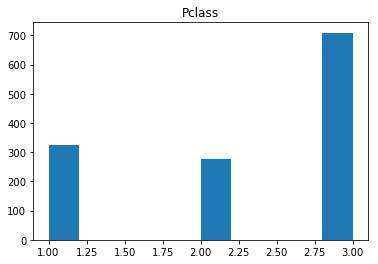

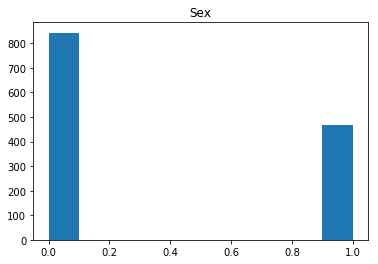

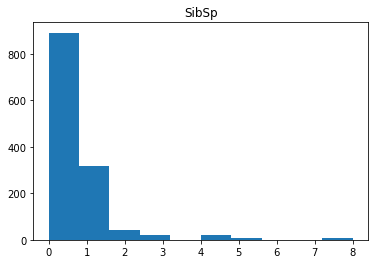

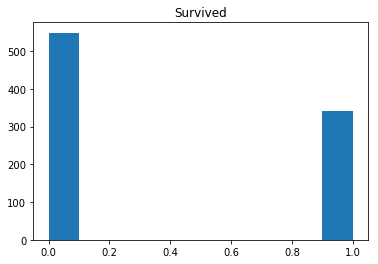

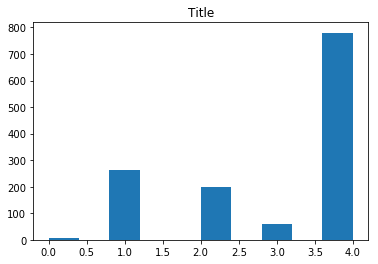

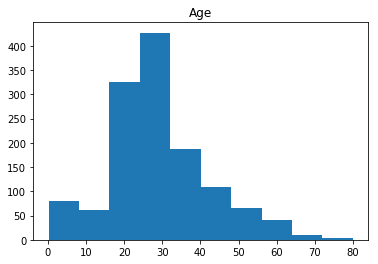

In [151]:
datapath = 'data/'
train = pd.read_csv(datapath+'train.csv')
test = pd.read_csv(datapath+'test.csv')
# 66% Train, 33% test
data = train.append(test)
# data shape - 1309, 12


print("Number of unique tickets {} for {} passengers".format(len(np.unique(data['Ticket'])), data.shape[0]))

data.drop(['Ticket'], axis = 1, inplace = True)      # Throw out 'Ticket' unnessesary info
print(data.count())                                  # print the count of no NaN values
data.drop(['Cabin'], axis = 1, inplace = True)       # Throw out 'Cabin', too much missing values


# Code 'Embarked' and 'Sex' as numbers
cleanup_nums = {"Embarked":     {"C": 0, "Q": 1, "S": 2},
                "Sex":          {"male": 0, "female": 1}}
data.replace(cleanup_nums, inplace=True)
data.head()


print("Count of each place of embarkment\n {}".format(data['Embarked'].value_counts()))
data['Embarked'].fillna(2.0, inplace=True)  # fill with the most common

# From 'Name' column extract 'Title' - Mr., Mrs., Master., Miss., other

data['Title'] = data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
print(data['Title'].value_counts())   
cleanup_nums = {"Title":     {  'Rev' : 'Mr',
                                'Dr'  : 'Mr',
                                'Col' : 'Mr',
                                'Mlle': 'Miss',
                                'Major' : 'Mr',                            
                                'Ms'  :'Miss',                
                                'Mme' : 'Mrs',               
                                'Sir' : 'Mr'}}  # Replace most titles           
data.replace(cleanup_nums, inplace=True)
cleanup_nums = {"Title": {'Miss'  : 1,
                          'Mrs'   : 2,
                          'Master': 3,
                          'Mr'    : 4,
                          'Capt'  : 0,            
                          'Dona'  : 0,           
                          'Don'   : 0,           
                          'the Countess' : 0,
                          'Jonkheer' : 0,
                          'Lady' : 0}}
data.replace(cleanup_nums, inplace=True)
data.drop(['Name'], axis = 1, inplace = True) # Drop the name after extracting the useful info out of it

data.drop(['PassengerId'], axis = 1, inplace = True) # Remove the id and refer by row number


median_ages = np.zeros((5))
for i in range(0, 5):
        median_ages[i] = data[(data.Title == i)]['Age'].dropna().median()
data['AgeFill'] = data.Age
for i in range(0, 5):
        data.loc[(data.Age.isnull()) & (data.Title == i) , 'AgeFill'] = median_ages[i]
data.drop(['Age'], axis = 1, inplace = True)

data.rename(index=str, columns={'AgeFill' : 'Age'}, inplace=True)

data.head()







for i in range(1,4):
    plt.hist(data[(data.Pclass == i)]['Fare'].dropna())
    plt.title("Class {} Fare distribution".format(i))
    plt.show()


data.Survived.hist(by=train.Pclass,layout=(3,1),sharex=True)

#bins = [0, 15, 40, 60, 80, 100, 500]

#categories = pd.cut(data['Fare'], bins)
#data['FareBinned'] = pd.cut(data['Fare'], bins).astype(float)

#data.Survived.hist(by=data.FareBinned,layout=(5,2),sharex=True)

for col in ['Embarked', 'Pclass', 'Sex', 'Title']:
    data[col] = data[col].astype('int8')

data.dtypes

# Visualize the distribution of all the variables

for col in data:
    plt.hist(data[col].dropna())
    plt.title(col)
    plt.show()

In [152]:
data.dtypes

Embarked       int8
Fare        float64
Parch         int64
Pclass         int8
Sex            int8
SibSp         int64
Survived    float64
Title          int8
Age         float64
dtype: object

In [160]:
# Lastly save the clean data

print(data.count())

collist = data.columns.tolist()
collist.remove('Survived')

y = data['Survived'].as_matrix()
x = data[collist].as_matrix()

x_train = x[:train.shape[0]]
y_train = y[:train.shape[0]]
x_test = x[train.shape[0]:]


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)


import h5py
f.close()


# FIGURE OUT HOW TO SAVE DATA IN HDF5 format

f = h5py.File("mytestfile.hdf5", "w")

f.create_dataset("x_train", x_train)
f.create_dataset("y_train", y_train)
f.create_dataset("x_test", x_test)

f.close()

Embarked    1309
Fare        1308
Parch       1309
Pclass      1309
Sex         1309
SibSp       1309
Survived     891
Title       1309
Age         1309
dtype: int64
(891, 8)
(891,)
(418, 8)


TypeError: Can't convert element 0 ([  2.     7.25   0.     3.     0.     1.     4.    22.  ]) to hsize_t